# Game Review Prediction

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.preprocessing as sklp
import sklearn.model_selection as skms
import sklearn.tree as sktree
import sklearn.neighbors as sknn
import sklearn.metrics as skm
import sklearn.dummy as skd
import sklearn as sk
import matplotlib.pyplot as plt

### Loading Data

This dataset contains the rating and various other atributes from almost 6,000 games. There are many atributes like year of release, genre, number of follows, and the target atribute of prediction: rating.

**Feature description**:

**DLC's and Expansions**: The amount of unlockable content the game has, worth noting that expansions are contained in the DLC's, so DLC's >= Expansions will always be true.

**year**: Year of the game release.

**follows**: Number of users following the game. (IGDB)

**in_franchise**: A boolean value that represents True if a game is inside a franchise (e.g., “Star Wars Racer” → True since it belongs to the Star Wars franchise)

**genres**: The genres of a specific game, we will encode this data in order to get every combination of genres we have, and in the future, correlate genres with reviews.

**companies**: The companies that developed/published the game.

**platforms**: The platforms the games are available on.

**user_score**: A numerical value of the game review.

**user_rating**: A categorical value of the game reviews, stated as either bad, mediocre, good or great, each one represents 25% of the user_score.

**n_user_reviews**: The amount of user reviews.

**summary**: A brief summary of the game.

In [2]:
games = pd.read_csv('video_games.csv', sep=',')
games.columns = ['ID','Name','Category',"DLC's", "Expansions", 'year', 'follows','in_franchise','genres','companies','platforms','user_score','user_rating','n_user_reviews','summary']
games.head()

,ID,Name,Category,DLC's,Expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,Grand Theft Auto V,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",90.202388,great,3369,Grand Theft Auto V is a vast open world game s...
1,1942,The Witcher 3: Wild Hunt,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",95.169577,great,2997,"RPG and sequel to The Witcher 2 (2011), The Wi..."
2,472,The Elder Scrolls V: Skyrim,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",87.508504,great,2567,Skyrim reimagines and revolutionizes the open-...
3,72,Portal 2,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",91.650705,great,2544,"Sequel to the acclaimed Portal (2007), Portal ..."
4,71,Portal,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",86.931758,great,2297,"Waking up in a seemingly empty laboratory, the..."


In [3]:
games.describe()

,ID,DLC's,Expansions,year,follows,user_score,n_user_reviews
count,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000,5824.000000
mean,18508.000515,0.450721,0.120707,2007.293784,35.428056,75.115510,86.186470
std,30546.018723,2.150920,0.811236,9.342881,85.026280,10.197815,194.781917
min,1.000000,0.000000,0.000000,1971.000000,0.000000,10.266748,11.000000
25%,2271.750000,0.000000,0.000000,2001.000000,5.000000,69.937370,16.000000
50%,7258.000000,0.000000,0.000000,2009.000000,11.000000,76.258903,28.000000
75%,18581.250000,0.000000,0.000000,2015.000000,28.000000,81.695739,67.000000
max,178351.000000,44.000000,29.000000,2022.000000,1766.000000,99.738172,3369.000000


In [4]:
games = games.rename(columns={'ID':'id', 'Name':'name','Category':'category',"DLC's":'dlcs','Expansions':'expansions'})
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5824 non-null   int64  
 1   name            5824 non-null   object 
 2   category        5824 non-null   object 
 3   dlcs            5824 non-null   int64  
 4   expansions      5824 non-null   int64  
 5   year            5824 non-null   int64  
 6   follows         5824 non-null   int64  
 7   in_franchise    5824 non-null   bool   
 8   genres          5803 non-null   object 
 9   companies       5781 non-null   object 
 10  platforms       5824 non-null   object 
 11  user_score      5824 non-null   float64
 12  user_rating     5824 non-null   object 
 13  n_user_reviews  5824 non-null   int64  
 14  summary         5816 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(7)
memory usage: 642.8+ KB


In [5]:
gamesnumerical = ["id", "dlcs", "expansions", "year", "follows", "user_score", "n_user_reviews", "user_rating"]
gamesNumerical = games[gamesnumerical]

In [6]:
# gamesNumericalPlot = sns.pairplot(gamesNumerical, hue='user_rating')

In [7]:
catg = (games.dtypes == "object")
gamescategorical = list(catg[catg].index)

gamesEncoded = games.copy()

encoder = sklp.LabelEncoder()

for col in gamescategorical:
    gamesEncoded[col] = (encoder.fit_transform(gamesEncoded[col]))

gamesEncoded.head()

,id,name,category,dlcs,expansions,year,follows,in_franchise,genres,companies,platforms,user_score,user_rating,n_user_reviews,summary
0,1020,1937,6,0,0,2013,1766,True,517,3001,735,90.202388,2,3369,2056
1,1942,5054,6,4,2,2015,1516,True,428,4150,782,95.169577,2,2997,3560
2,472,4752,6,3,0,2011,1046,False,428,492,671,87.508504,2,2567,3985
3,72,3557,6,3,0,2011,963,True,550,4065,231,91.650705,2,2544,3825
4,71,3556,6,0,0,2007,894,True,549,4063,232,86.931758,2,2297,5419


In [8]:
# sns.pairplot(gamesEncoded, hue='user_rating')

<AxesSubplot:>

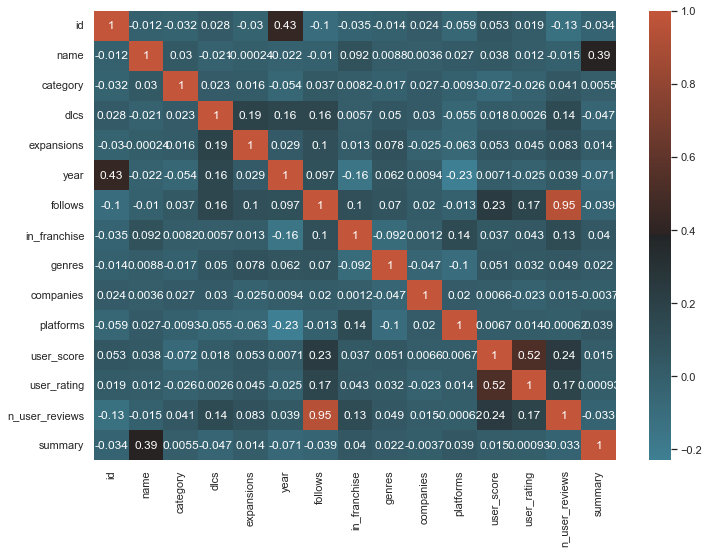

In [9]:
corrmap = sns.diverging_palette(220,20, center="dark",as_cmap=True)
corrmat = gamesEncoded.corr()

sns.set(rc={'figure.figsize':(11.7,8.27)})

sbplt = plt.subplots()
sns.heatmap(
    corrmat,
    cmap = corrmap,
    annot = True,
    )


In [10]:
X = gamesEncoded[["follows", "n_user_reviews", "in_franchise", "expansions", "genres"]]
Y = gamesEncoded[["user_rating"]]
SEED = 135
X_train, X_test, Y_train, Y_test = skms.train_test_split(X, Y, test_size=0.3, random_state= SEED, stratify= Y)

## Dummy Classifier:

In [11]:
dummy = skd.DummyClassifier(strategy = "most_frequent")
dummy.fit(X_train, Y_train)
dummy.score(X_test, Y_test)
print("Dummy Classification by most frequent: ", (dummy.score(X_test, Y_test) * 100), "%")


Dummy Classification by most frequent:  0.5480549199084668 %


## Using Tree Decision Classifier:

In [12]:
# Crio uma árvore de decisões
DecisionModel = sktree.DecisionTreeClassifier(criterion = "gini", max_leaf_nodes= 19, random_state= 0, max_depth= 5)
# Treino a árvore com os dataframe de treino
DecisionModel.fit(X_train, Y_train)
#Crio uma série com as predictions de cada diamante
trainPrediction = DecisionModel.predict(X_train)
# Junto essa série ao dataframe de treino para comparar
Y_train['Prediction'] = trainPrediction
# Crio uma coluna de resultados, em que cada linha tem o valor 1 caso a previsão e o cut sejam os mesmos, e 0 caso contrário
Y_train['Result'] = (Y_train['user_rating'] == Y_train['Prediction']).astype(int)
# Somo a quantidade de 1's na coluna Result, e divido pela quantidade de diamantes

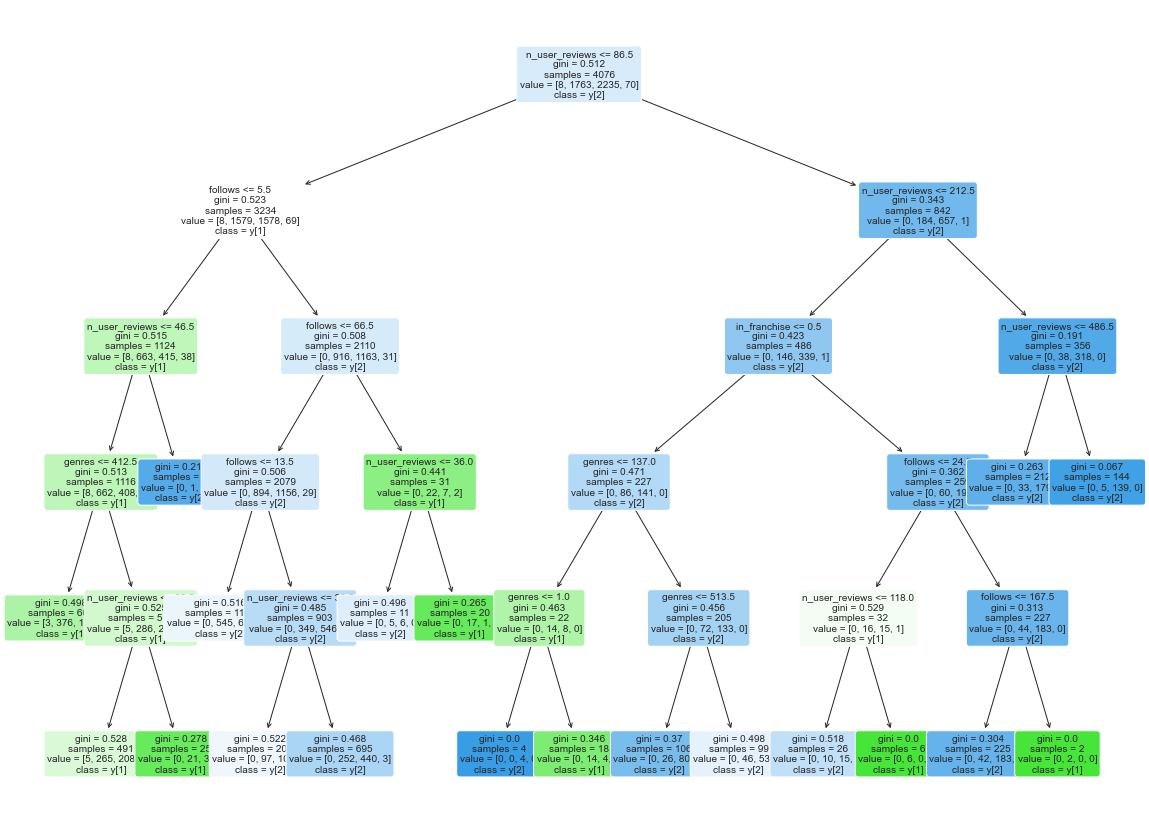

In [13]:
plt.figure(figsize=(20,15))

a = sktree.plot_tree(DecisionModel, rounded = True, filled = True, fontsize= 10, class_names= True, feature_names= ["follows", "n_user_reviews", "in_franchise", "expansions", "genres"])
plt.show()

In [14]:
trainAccurracy = Y_train['Result'].sum() / len(trainPrediction)
print("Train Accurracy:",trainAccurracy * 100, "%")

Train Accurracy: 61.89892051030422 %


Text(81.8, 0.5, 'User Ratings')

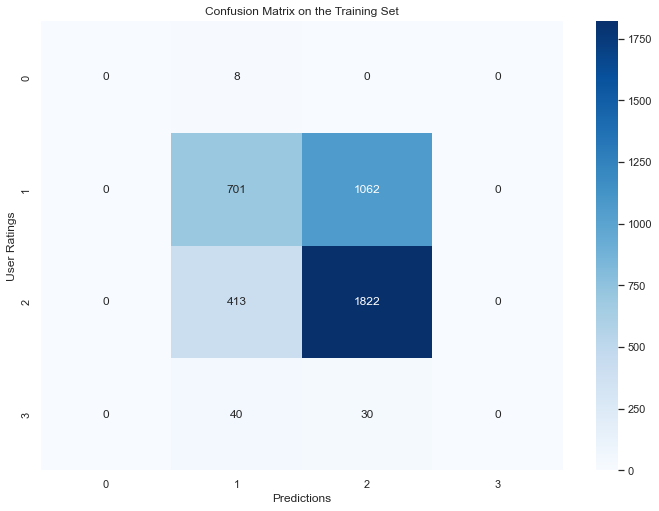

In [15]:
cm = sk.metrics.confusion_matrix(Y_train['user_rating'],Y_train['Prediction'])
tcm = sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")
tcm.set_title("Confusion Matrix on the Training Set")
tcm.set_xlabel("Predictions")
tcm.set_ylabel("User Ratings")

In [16]:
testPrediction = DecisionModel.predict(X_test)
Y_test['Prediction'] = testPrediction
Y_test['Result'] = (Y_test['user_rating'] == Y_test['Prediction']).astype(int)

In [17]:
testAccurracy = Y_test['Result'].sum() / len(testPrediction)
print("Test Accurracy:",testAccurracy * 100, "%")

Test Accurracy: 60.18306636155606 %


Text(81.8, 0.5, 'User Ratings')

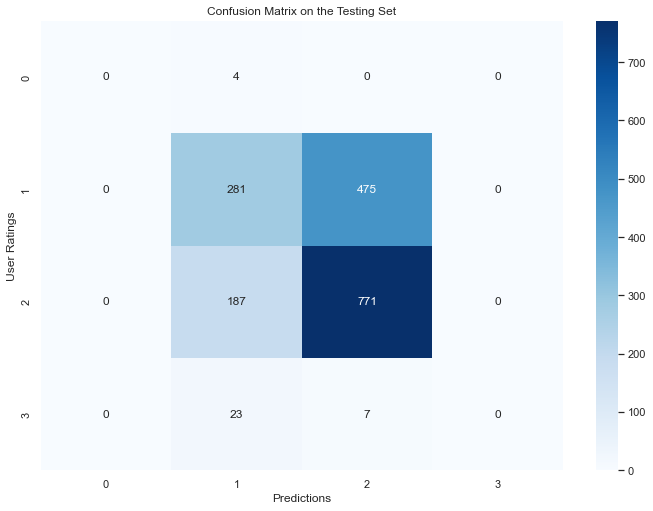

In [18]:
cm = sk.metrics.confusion_matrix(Y_test['user_rating'],Y_test['Prediction'])
tcm = sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")
tcm.set_title("Confusion Matrix on the Testing Set")
tcm.set_xlabel("Predictions")
tcm.set_ylabel("User Ratings")

In [19]:
ReviewPrediction = Y_test
ReviewPrediction['Review'] = games['user_rating']

encoding = {
    0:'bad',
    1:'good',
    2:'great',
    3:'mediocre'
}

ReviewPrediction['Prediction'] = Y_test['Prediction'].map(encoding)
ReviewPrediction['Name'] = games['name']
ReviewPrediction = ReviewPrediction[['Name', 'Review', 'Prediction']]

ReviewPrediction.head(15)

,Name,Review,Prediction
4156,NHL 17,great,good
1968,Strider,good,great
3980,Book of Demons,great,good
4557,Combat,good,good
1475,SoulCalibur VI,great,great
446,Spore,good,great
4661,Band Hero,good,good
3610,Ghost of a Tale,great,great
3924,The Night of the Rabbit,great,great
2257,Sid Meier's Colonization,great,great


## Using K-Neighbors Classifier:

In [20]:
X2_train, X2_test, Y2_train, Y2_test = skms.train_test_split(X, Y, test_size=0.3, random_state= SEED, stratify= Y)

#### Vamos fazer um gráfico para ver o melhor número de neighbors:

In [21]:
neighbors = np.arange(1,150)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = sknn.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X2_train, Y2_train.values.ravel())
    train_accuracy[i] = knn.score(X2_train, Y2_train)
    test_accuracy[i] = knn.score(X2_test, Y2_test) 

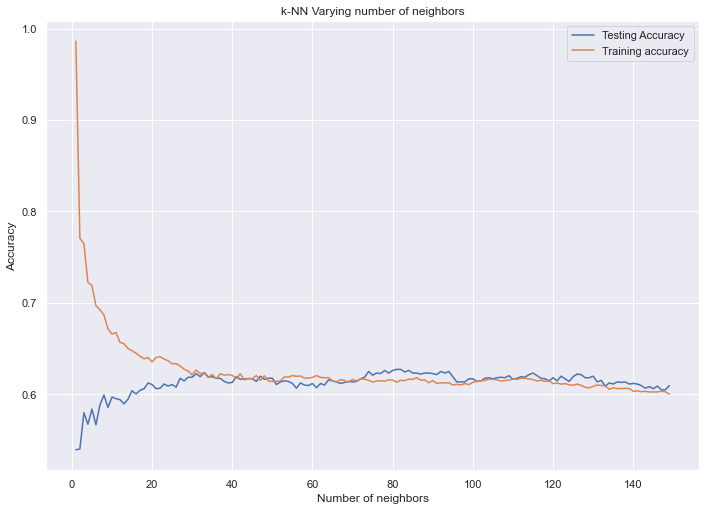

In [22]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
highest_acc = max(test_accuracy)

print("Highest Accuracy: ", (highest_acc * 100), "%")

highest_acc_index = np.argmax(test_accuracy, axis= 0)

print("Highest Accuracy Index: ", highest_acc_index)

Highest Accuracy:  62.70022883295194 %
Highest Accuracy Index:  80


#### Agora com esse número, vamos fazer o nosso modelo:

In [29]:
knn = sknn.KNeighborsClassifier(n_neighbors = highest_acc_index)
knn.fit(X2_train, Y2_train.values.ravel())
Y2_pred = knn.predict(X2_test)
print("K-NN Accuracy: ", (knn.score(X2_test, Y2_test) * 100), "%")

K-NN Accuracy:  62.58581235697941 %


Text(81.8, 0.5, 'User Ratings')

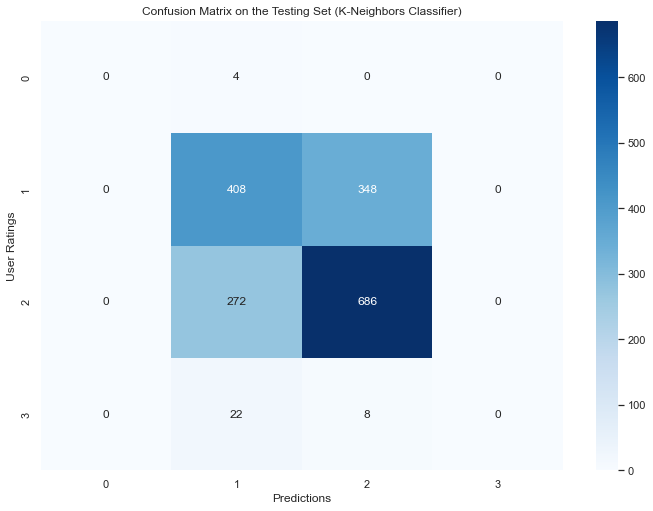

In [25]:
cm = sk.metrics.confusion_matrix(Y2_test,Y2_pred)
tcm = sns.heatmap(cm,annot=True,fmt="d",cmap = "Blues")
tcm.set_title("Confusion Matrix on the Testing Set (K-Neighbors Classifier)")
tcm.set_xlabel("Predictions")
tcm.set_ylabel("User Ratings")

#### Reciever Operating Characteristic Curve (ROC)

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [26]:
Y2_rokakaka = knn.predict_proba(X2_test)

In [27]:
fp, tp , intervalos = skm.roc_curve(Y2_test, Y2_rokakaka,pos_label=0)

ValueError: y should be a 1d array, got an array of shape (1748, 4) instead.

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

NameError: name 'plt' is not defined